## Plot tumor purity prediction results

Here, we'll visualize the results of our tumor purity prediction. We're predicting real-valued purity labels here (e.g. elastic net regression).

Results analyzed here are generated by the `run_purity_prediction.py` script, without the `--classify` argument.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mpmp.config as cfg
import mpmp.utilities.analysis_utilities as au

In [2]:
# set results directory
results_dir = Path(cfg.results_dir,
                   'purity_reg_results',
                   'purity').resolve()

In [3]:
results_df = (
    au.load_purity_results(results_dir)
      .drop(columns=['identifier'])
)
# all me_450k results are compressed
results_df[results_df.training_data == 'me_450k'] = 'me_450k_compressed'
print(results_df.shape)
print(results_df.training_data.unique())
results_df.head()

(240, 8)
['me_27k' 'expression_compressed' 'me_450k_compressed' 'me_27k_compressed'
 'expression']


,mse,rmse,r2,data_type,training_data,signal,seed,fold_no
0,0.018233,0.13503,0.59265,train,me_27k,signal,1,0
1,0.028396,0.16851,0.36558,cv,me_27k,signal,1,0
2,0.018659,0.1366,0.59843,test,me_27k,signal,1,0
3,0.019189,0.13852,0.57664,train,me_27k,signal,1,1
4,0.026655,0.16326,0.41191,cv,me_27k,signal,1,1


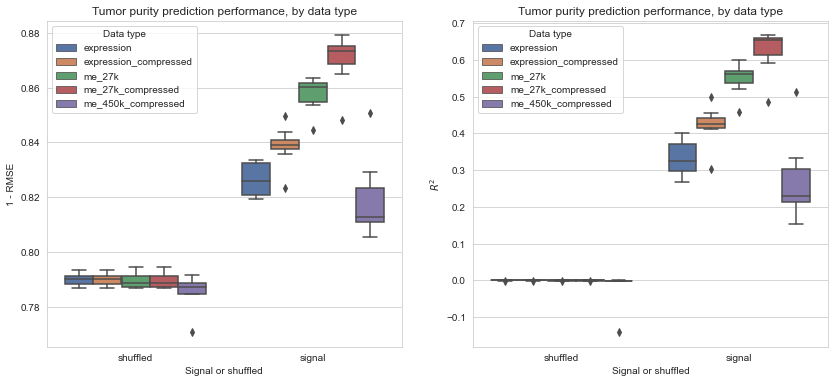

In [4]:
sns.set({'figure.figsize': (14, 6)})
sns.set_style('whitegrid')
fig, axarr = plt.subplots(1, 2)

plot_df = (
    results_df[results_df.data_type == 'test']
      .sort_values(by=['signal', 'training_data'])
)
plot_df['inv_rmse'] = 1 - plot_df.rmse

sns.boxplot(data=plot_df, x='signal', y='inv_rmse', hue='training_data', ax=axarr[0])
axarr[0].set_title('Tumor purity prediction performance, by data type')
axarr[0].set_xlabel('Signal or shuffled')
axarr[0].set_ylabel('1 - RMSE')
axarr[0].legend(title='Data type')
sns.boxplot(data=plot_df, x='signal', y='r2', hue='training_data', ax=axarr[1])
axarr[1].set_title('Tumor purity prediction performance, by data type')
axarr[1].set_xlabel('Signal or shuffled')
axarr[1].set_ylabel(r'$R^2$')
axarr[1].legend(title='Data type')